# Lesson 31: Extracting data of interest

(c) 2016 Justin Bois. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

*This tutorial was generated from a Jupyter notebook.  You can download the notebook [here](l31_frog_pandas.ipynb).*

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In the last lesson, we learned about Pandas and dipped our toe in to see its power.  In this lesson, we will work with a more complicated data set and use Pandas to handle it and pull out what we need.

## The data set

The data set comes from Kleinteich and Gorb, *Sci. Rep.*, **4**, 2014, and was [featured in the New York Times](http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html).  They measured several properties about the tongue strikes of horned frogs.  Let's take a look at the data set, which is in the file `~git/data/frog_tongue_adhesion.csv`.

In [3]:
!head -n 20 data/frog_tongue_adhesion.csv

The first lines all begin with # signs, signifying that they are comments and not data. They do give important information, though, such as the meaning of the ID data. The ID refers to which specific frog was tested.

Immediately after the comments, we have a row of comma-separated headers. This row sets the number of columns in this data set and labels the meaning of the columns. So, we see that the first column is the date of the experiment, the second column is the ID of the frog, the third is the trial number, and so on.

After this row, each row represents a single experiment where the frog struck the target.  So, these data are already in tidy format.  Let's go ahead and load the data into a `DataFrame`.

In [5]:
# Load the data
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

# Take a look
df

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975
5,2013_03_01,I,4,2276,31,3.68,-592,969,0.96,-0.176,341,106,0.69,6676,-1737
6,2013_03_05,I,1,556,43,0.90,-512,835,0.83,-0.285,359,110,0.69,1550,-1427
7,2013_03_05,I,2,1928,46,3.11,-804,508,1.30,-0.285,246,178,0.28,7832,-3266
8,2013_03_05,I,3,2641,50,4.27,-690,491,1.12,-0.239,269,224,0.17,9824,-2568
9,2013_03_05,I,4,1897,41,3.06,-462,839,0.75,-0.328,266,176,0.34,7122,-1733


## Selecting data

We can now access various subsets of the data.  For example, let's say we are only interested in strong strikes, i.e., those with an impact force above one Newton.  We just use Boolean slicing to get that out.

In [6]:
# Slice out big forces
df_big_force = df[df['impact force (mN)'] > 1000]

# Look at it
df_big_force

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
5,2013_03_01,I,4,2276,31,3.68,-592,969,0.96,-0.176,341,106,0.69,6676,-1737
7,2013_03_05,I,2,1928,46,3.11,-804,508,1.30,-0.285,246,178,0.28,7832,-3266
8,2013_03_05,I,3,2641,50,4.27,-690,491,1.12,-0.239,269,224,0.17,9824,-2568
9,2013_03_05,I,4,1897,41,3.06,-462,839,0.75,-0.328,266,176,0.34,7122,-1733
10,2013_03_12,I,1,1891,40,3.06,-766,1069,1.24,-0.380,408,33,0.92,4638,-1879
11,2013_03_12,I,2,1545,48,2.50,-715,649,1.15,-0.298,141,112,0.21,10947,-5064


Notice that the indices of the individual measurements did not change!  This newly formed `DataFrame` does not have an index 4, for example.  You can think of the indices as labels on experiments/observations, not as the ordering in an array.  In fact, ordering is not really relevant at all in a `DataFrame`.

We can also select a single experiment (very convenient that the `DataFrame` is tidy!).  As we learned last time, we use `.loc`.

In [7]:
df.loc[42, :]

date                                                    2013_05_27
ID                                                             III
trial number                                                     3
impact force (mN)                                              324
impact time (ms)                                               105
impact force / body weight                                    2.61
adhesive force (mN)                                           -172
time frog pulls on target (ms)                                 619
adhesive force / body weight                                  1.38
adhesive impulse (N-s)                                      -0.079
total contact area (mm2)                                        55
contact area without mucus (mm2)                                23
contact area with mucus / contact area without mucus          0.37
contact pressure (Pa)                                         5946
adhesive strength (Pa)                                       -

Conveniently, we get all the data and labels we need.

We can select multiple columns by giving a list of column headers.

In [8]:
df.loc[:, ['impact force (mN)', 'adhesive force (mN)']]

,impact force (mN),adhesive force (mN)
0,1205,-785
1,2527,-983
2,1745,-850
3,1556,-455
4,493,-974
5,2276,-592
6,556,-512
7,1928,-804
8,2641,-690
9,1897,-462


## Finding correlations

Now that we know how to slice out columns, we can start to find correlations.  For example, we might think that the impact force and the adhesive strength might be correlated.  Let's make a plot to check.

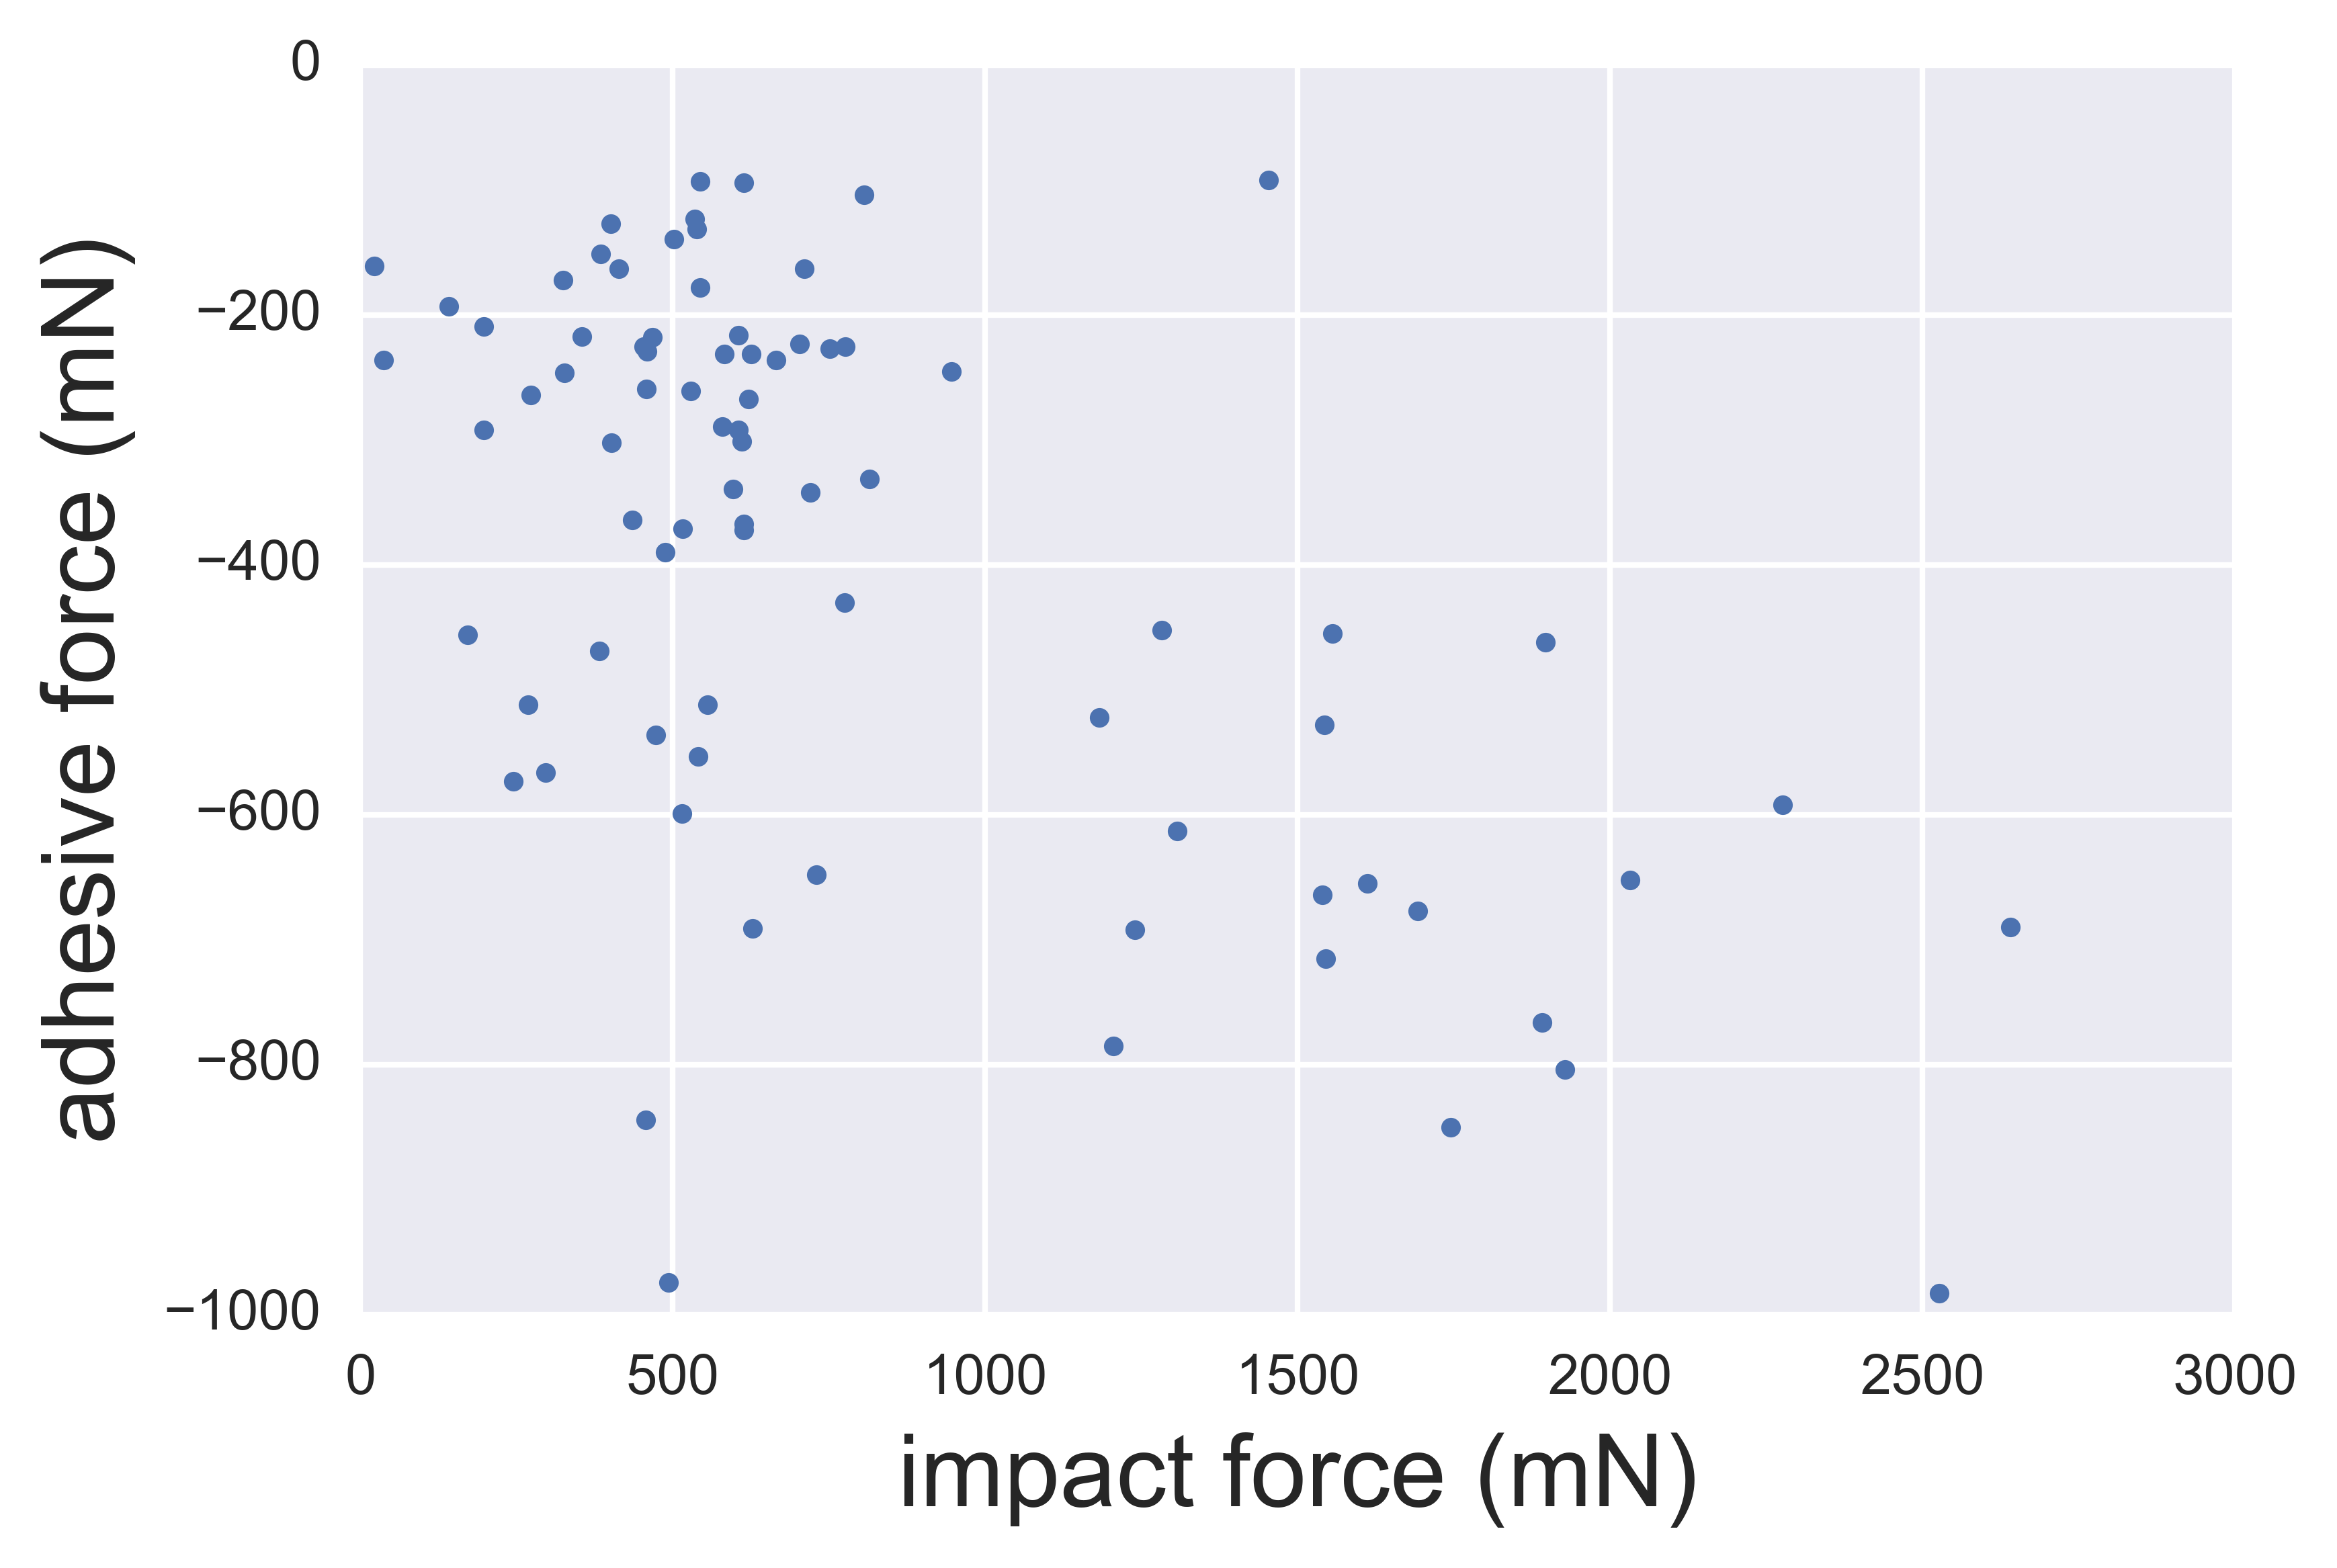

In [9]:
plt.plot(df['impact force (mN)'], df['adhesive force (mN)'], marker='.',
         linestyle='none')
plt.xlabel('impact force (mN)')
plt.ylabel('adhesive force (mN)')

There does, in fact, seem to be some correlation.  We could try any pair. As a trick to allow fast plotting, we will use the `DataFrame`'s built-in `plot()` method, that allows us to quickly make a plot with the axes already labeled.

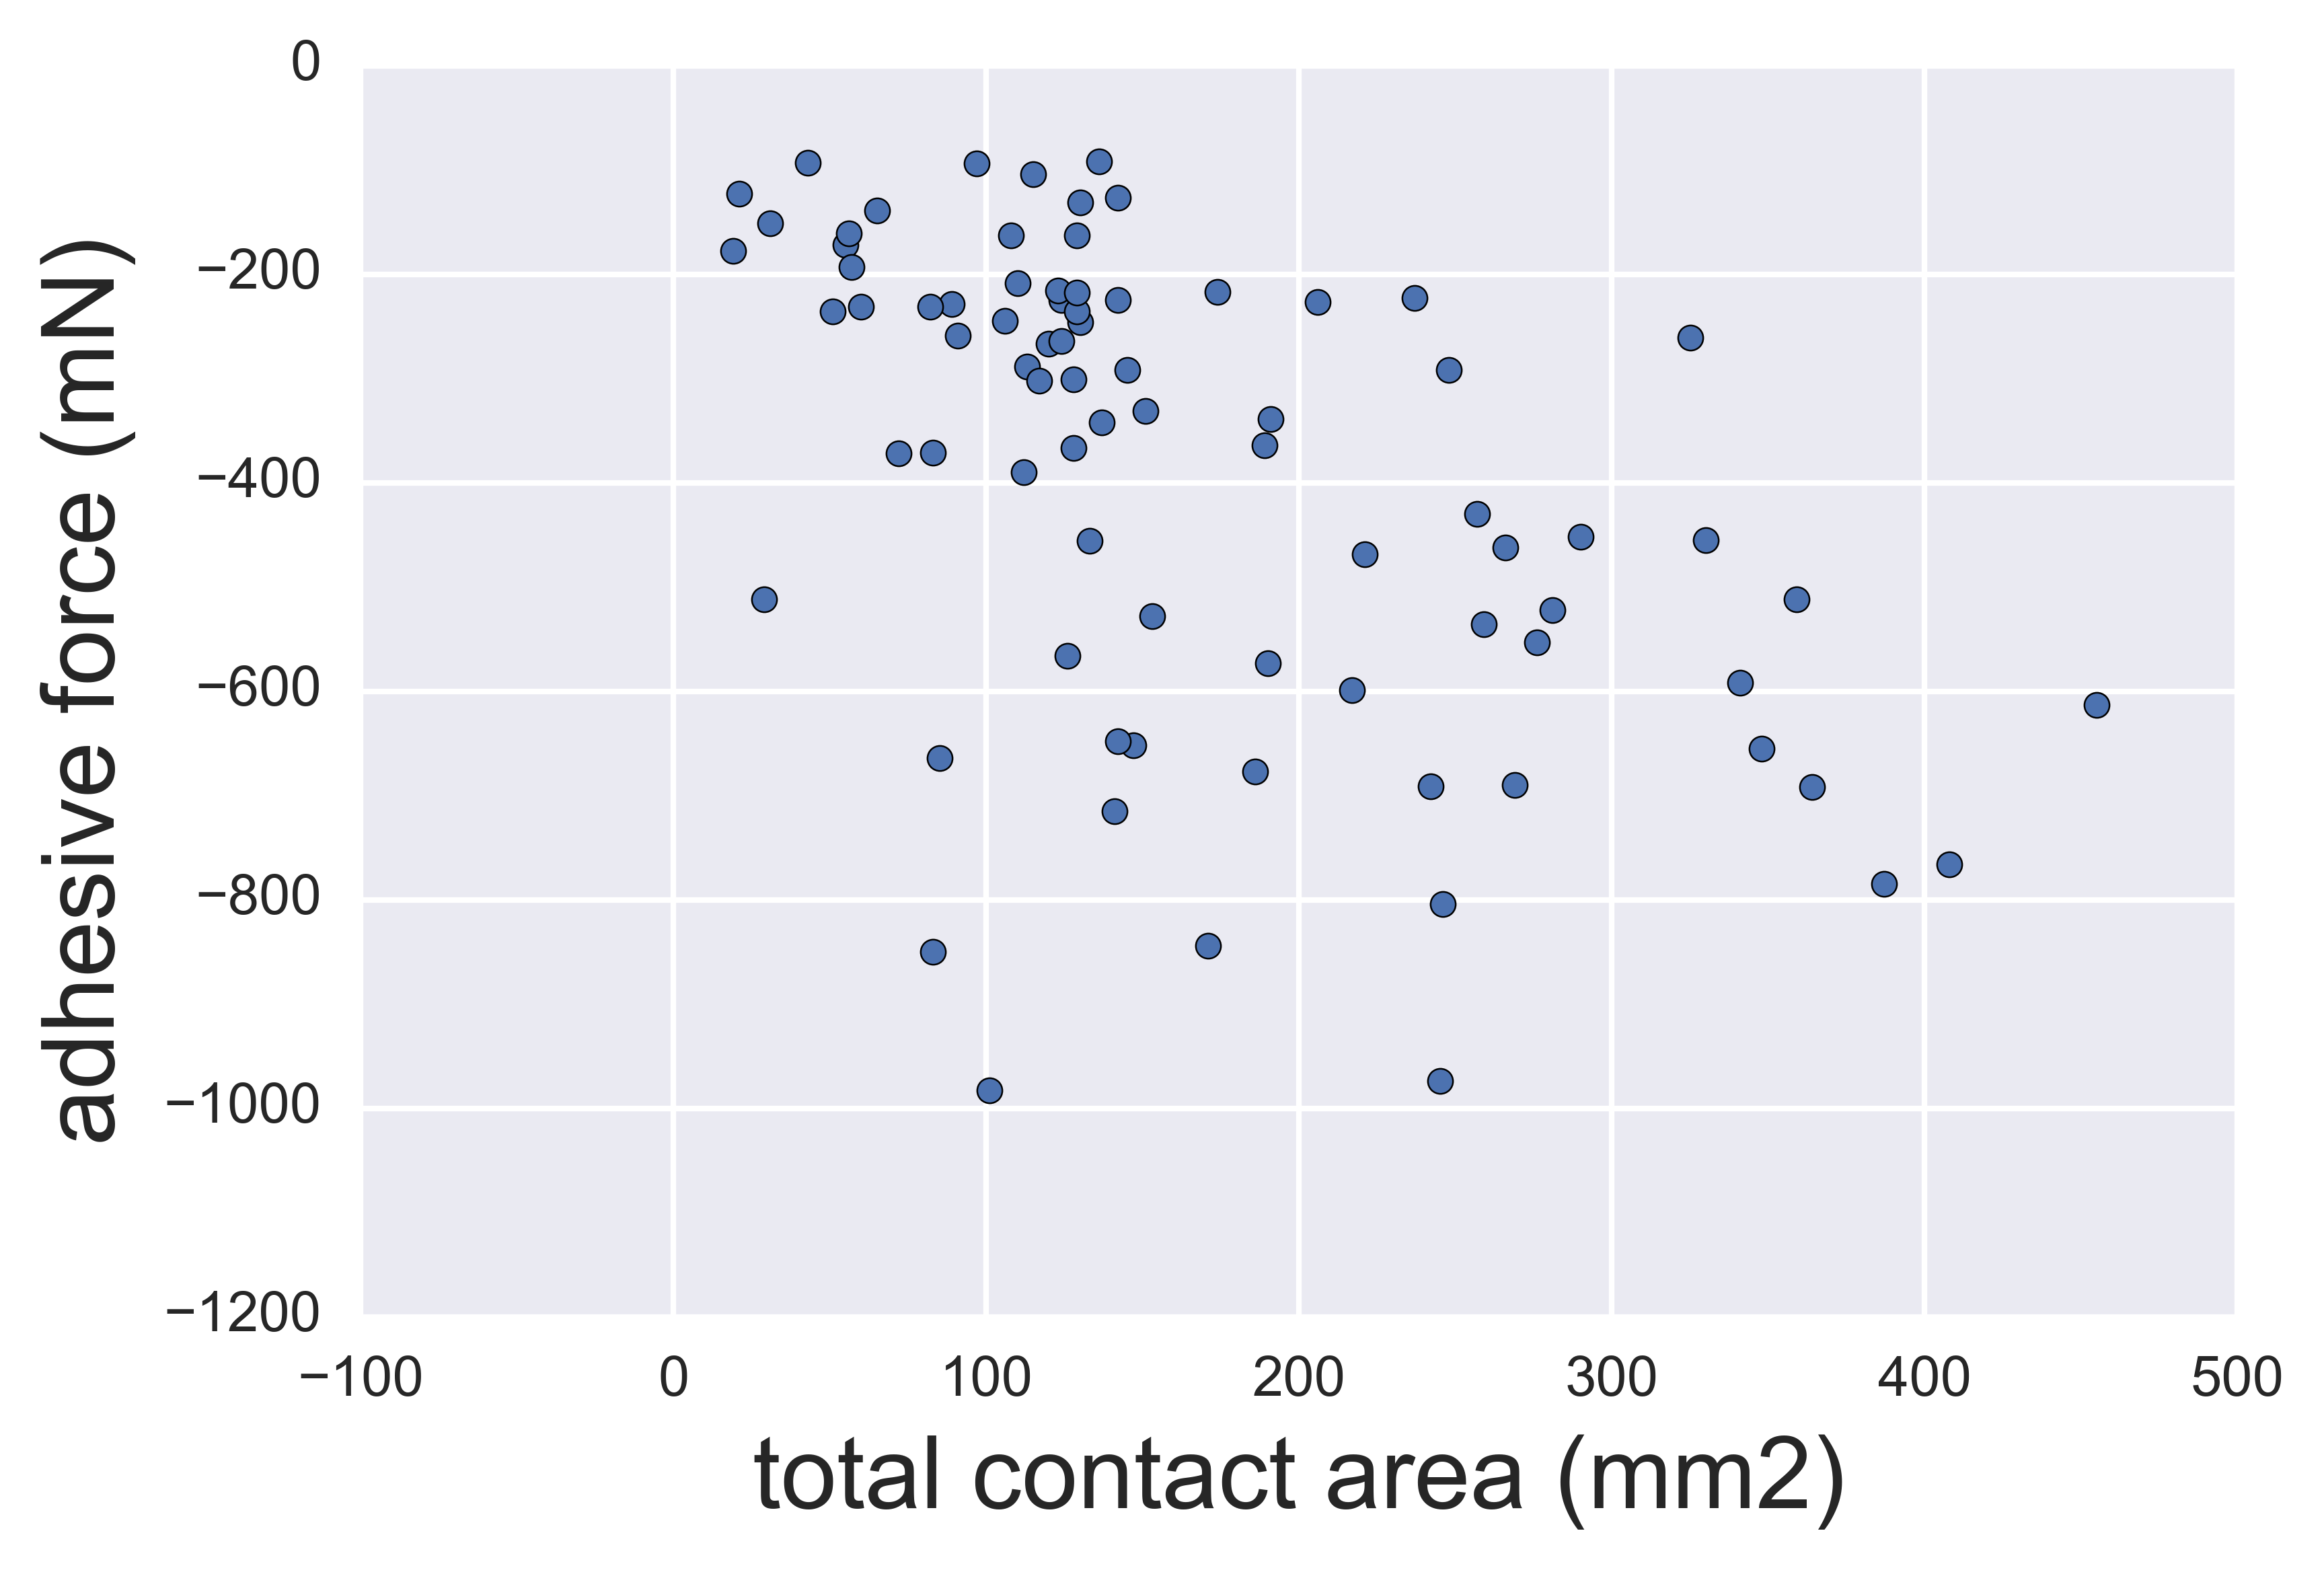

In [10]:
df.plot(x='total contact area (mm2)', y='adhesive force (mN)', kind='scatter')

There are other slick methods built in to `DataFrames`. For example, we can quickly compute the Pearson correlation between all pairs of data with the `corr()` method of the `DataFrame`.

In [11]:
df.corr()

,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
trial number,1.000000,0.081059,-0.012223,-0.165235,-0.144249,-0.300896,-0.000758,-0.152892,-0.070046,0.338473,-0.487218,0.105460,-0.228193
impact force (mN),0.081059,1.000000,0.065284,0.233450,-0.581344,-0.121341,-0.282177,-0.328656,0.436910,0.447339,-0.163551,0.436010,-0.087942
impact time (ms),-0.012223,0.065284,1.000000,0.060478,0.166485,-0.224467,-0.276984,0.184928,-0.151079,-0.054654,-0.001410,0.088254,-0.010054
impact force / body weight,-0.165235,0.233450,0.060478,1.000000,0.313570,0.055374,0.327074,0.303916,-0.291663,-0.190505,-0.084925,0.397020,0.089783
adhesive force (mN),-0.144249,-0.581344,0.166485,0.313570,1.000000,0.172685,-0.017410,0.518693,-0.517483,-0.488566,0.194437,-0.098643,0.336116
time frog pulls on target (ms),-0.300896,-0.121341,-0.224467,0.055374,0.172685,1.000000,0.006804,-0.369147,0.282509,-0.262914,0.620117,-0.353474,0.434311
adhesive force / body weight,-0.000758,-0.282177,-0.276984,0.327074,-0.017410,0.006804,1.000000,0.200359,-0.316363,-0.237184,-0.146312,-0.097282,-0.154410
adhesive impulse (N-s),-0.152892,-0.328656,0.184928,0.303916,0.518693,-0.369147,0.200359,1.000000,-0.684423,-0.434937,-0.058184,0.224038,-0.187740
total contact area (mm2),-0.070046,0.436910,-0.151079,-0.291663,-0.517483,0.282509,-0.316363,-0.684423,1.000000,0.383562,0.310887,-0.390094,0.417100
contact area without mucus (mm2),0.338473,0.447339,-0.054654,-0.190505,-0.488566,-0.262914,-0.237184,-0.434937,0.383562,1.000000,-0.394482,0.026032,0.007942


### Shortcut names
It is getting kind of cumbersome indexing with the long column headings.  The headings are nonetheless useful, since they are descriptive and we never have problems losing track of units.  But, let's say we wanted change `impact force (mN)` to `impf` for easier indexing.  We can use the `rename()` method of `DataFrame`s.  We just pass in a dictionary of columns we want to rename.

In [12]:
# Rename the impact force column
df = df.rename(columns={'impact force (mN)': 'impf'})

We will explore the power of Pandas more in the next lesson, when we practice with `DataFrame`s.